In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

results_dir = Path("../../../data/rq3/")

df = pd.read_csv(results_dir / "results/survey_with_codes.csv", header=[0, 1, 2])
df.columns.to_frame()

In [3]:
df = df.droplevel(2, axis=1)
df.columns.to_frame()
df = df.droplevel(1, axis=1)
full_length = len(df)
df = df[df["Finished"]]
full_length, len(df)

(379, 278)

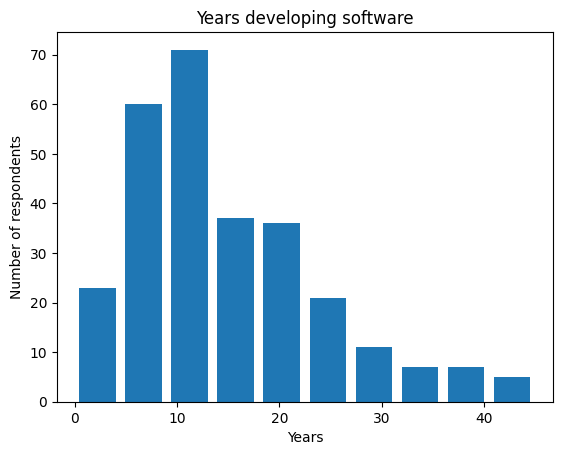

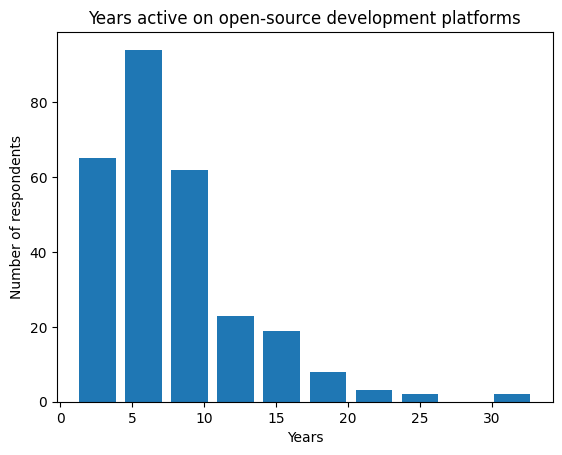

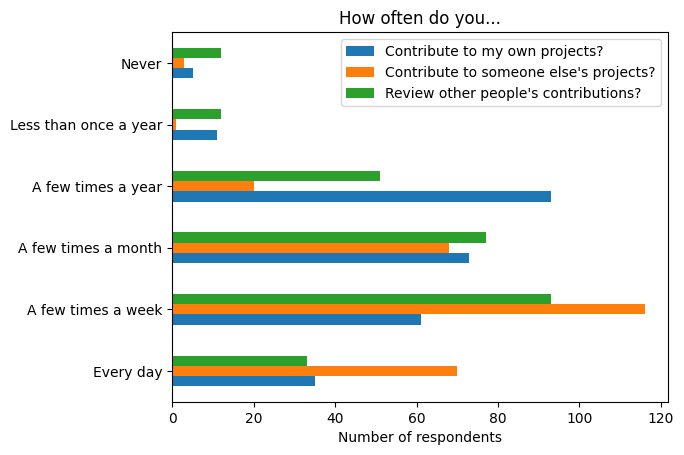

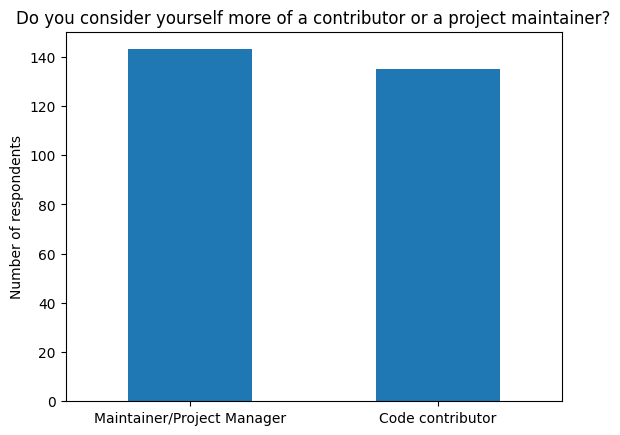

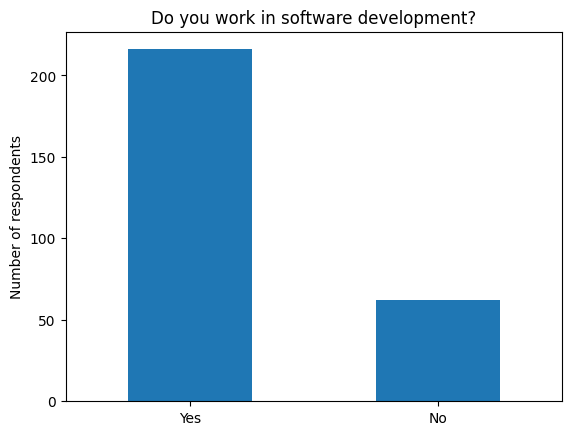

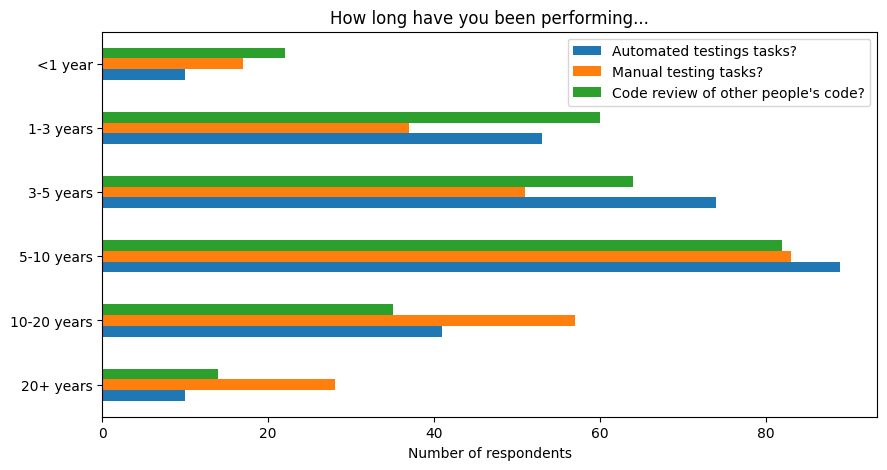

In [20]:
from src.rq3._questions import DEMOGRAPHIC

for k in DEMOGRAPHIC:
    s = df[list(k) if type(k) == tuple else k]
    v = DEMOGRAPHIC[k]
    if v["kind"].startswith("bar"):
        if type(s) == pd.DataFrame:
            s = s.apply(lambda x: x.value_counts())
        else:
            s = s.value_counts()
        if "order" in v:
            s = s.reindex(v["order"])
            s = s.iloc[::-1]
        ax = s.plot(
            kind=v["kind"],
            title=v["title"] if "title" in v else None,
            rot=v["rot"] if "rot" in v else None,
            figsize=v["figsize"] if "figsize" in v else None
        )
        if "columns" in v:
            ax.legend(v["columns"])
        if "ylabel" in v:
            ax.set_ylabel(v["ylabel"])
        if "xlabel" in v:
            ax.set_xlabel(v["xlabel"])
    else:
        ks = {}
        for x in v:
            ks[x] = v[x]
        ax = s.plot(**ks)
        if "ylabel" in v:
            ax.set_ylabel(v["ylabel"])
        if "xlabel" in v:
            ax.set_xlabel(v["xlabel"])
    plt.show()

(1.0, 5.0)

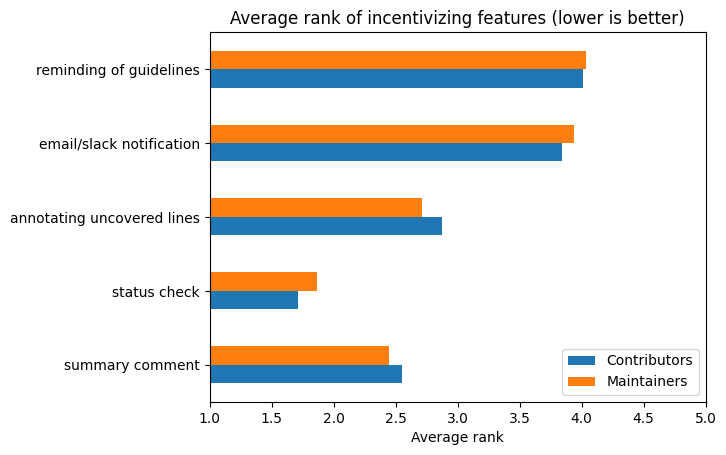

In [42]:
df_contributors = df[df["Dev/Maintain choice"] == "Code contributor"]
df_maintainers = df[df["Dev/Maintain choice"] == "Maintainer/Project Manager"]

options = {
    "Q47_114": "summary comment",
    "Q47_115": "status check",
    "Q47_116": "annotating uncovered lines",
    "Q47_118": "email/slack notification",
    "Q47_119": "reminding of guidelines",
}
df["ranked_first"] = df[["Q47_114",
                         "Q47_115",
                         "Q47_116",
                         "Q47_118",
                         "Q47_119"]].apply(lambda x: x.idxmin(), axis=1) \
    .str.replace("Q47_114", "summary comment") \
    .str.replace("Q47_115", "status check") \
    .str.replace("Q47_116", "annotating uncovered lines") \
    .str.replace("Q47_118", "slack/email notification") \
    .str.replace("Q47_119", "reminding of guidelines")
ranking_mean = pd.DataFrame()
ranking_mean["Contributors"] = df_contributors[["Q47_114",
                                                "Q47_115",
                                                "Q47_116",
                                                "Q47_118",
                                                "Q47_119"]].mean(0).rename(options).to_frame()
ranking_mean["Maintainers"] = df_maintainers[["Q47_114",
                                              "Q47_115",
                                              "Q47_116",
                                              "Q47_118",
                                              "Q47_119"]].mean(0).rename(options).to_frame()
ranking_mean.plot.barh(rot=0)
plt.legend(loc="best")
plt.title("Average rank of incentivizing features (lower is better)")
plt.xlabel("Average rank")
plt.xlim(1, 5)


In [40]:
df[["Q47_114",
    "Q47_115",
    "Q47_116",
    "Q47_118",
    "Q47_119"]]

# mode
df[["Q47_114",
    "Q47_115",
    "Q47_116",
    "Q47_118",
    "Q47_119"]].mode(0)\
    # .iloc[:, 0].value_counts()

,Q47_114,Q47_115,Q47_116,Q47_118,Q47_119
0,2.0,1.0,2.0,5.0,5.0


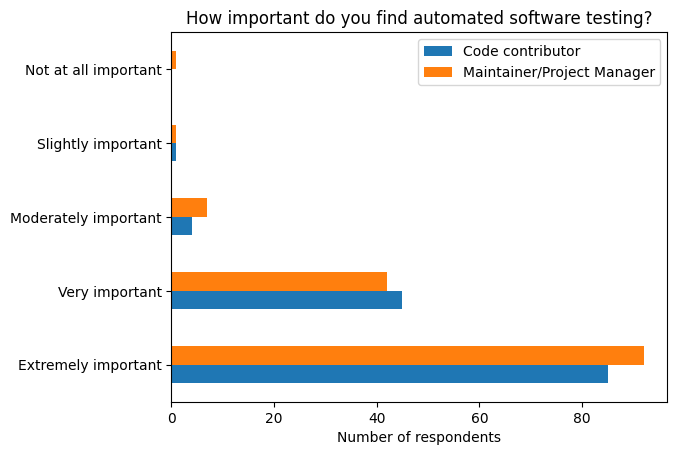

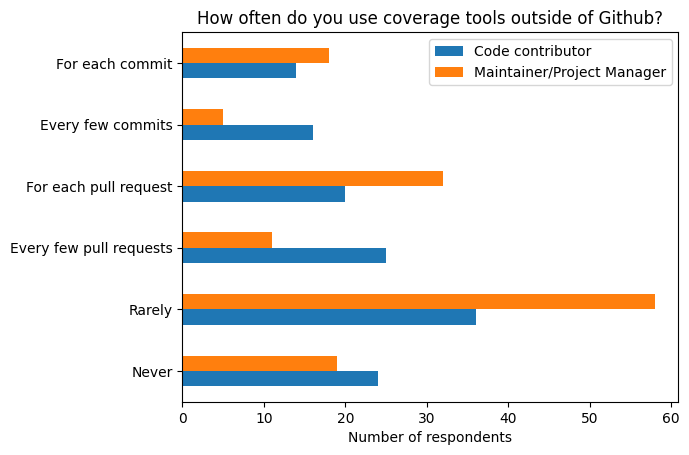

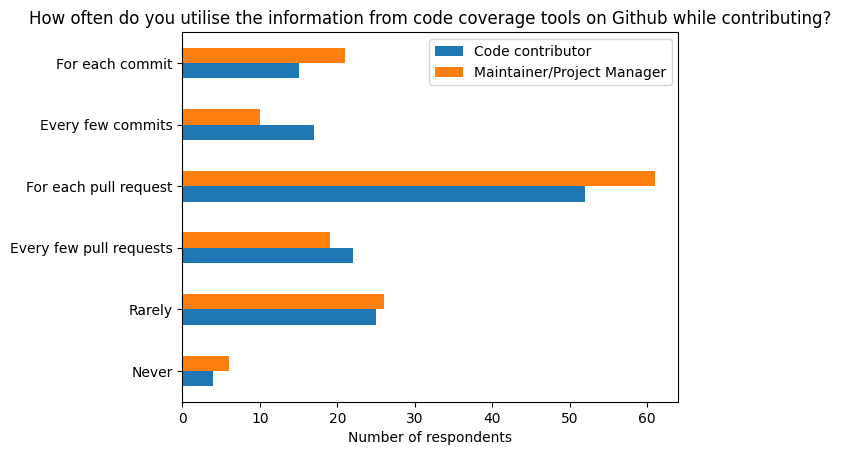

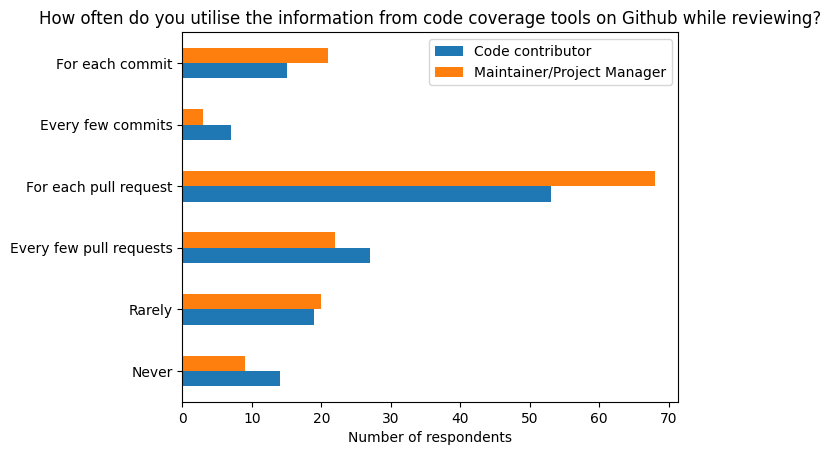

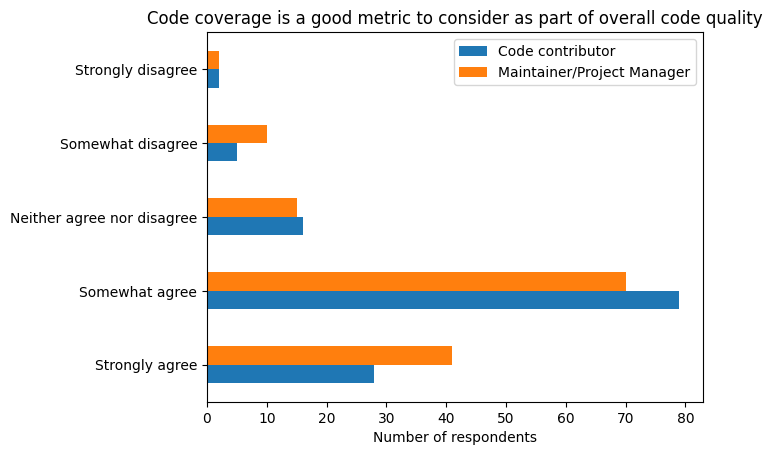

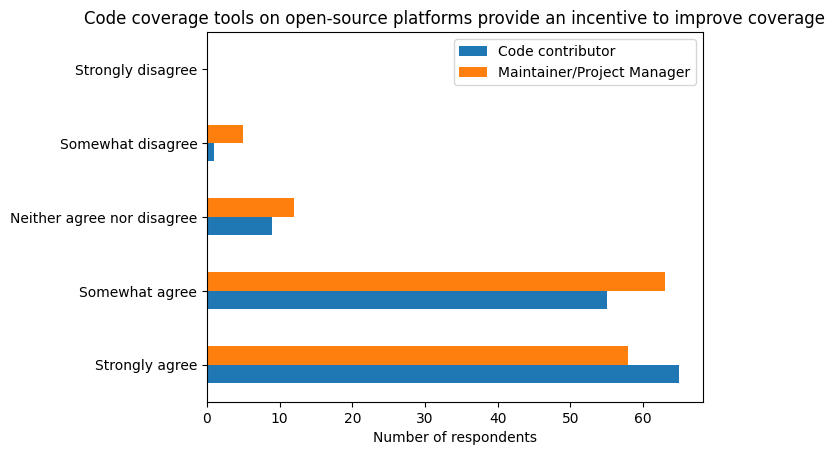

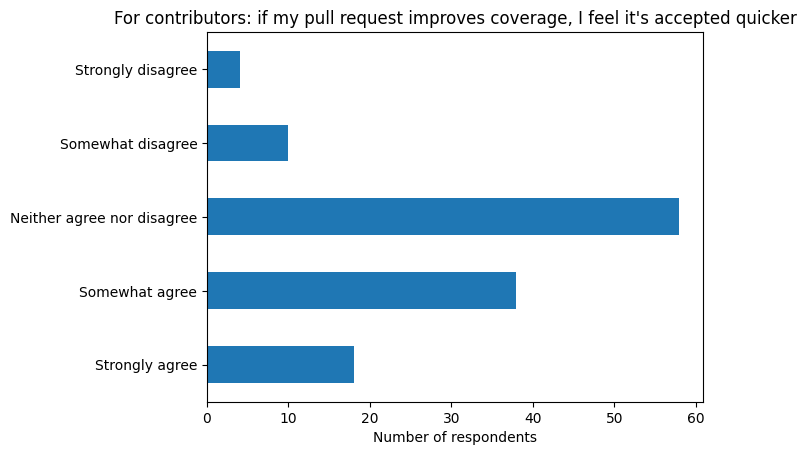

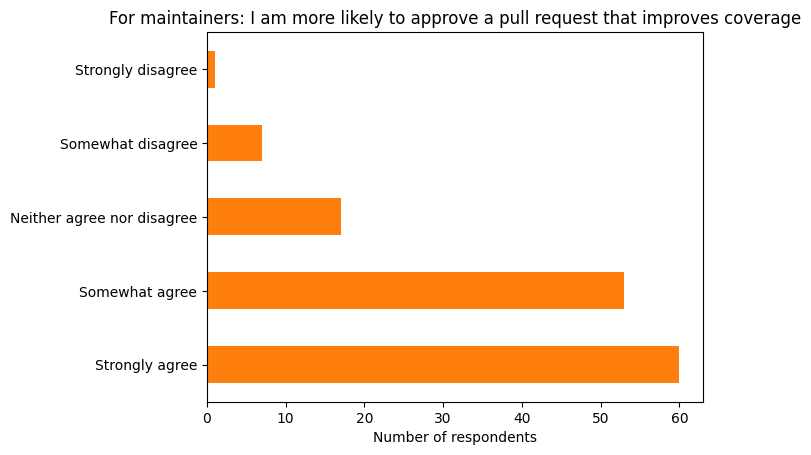

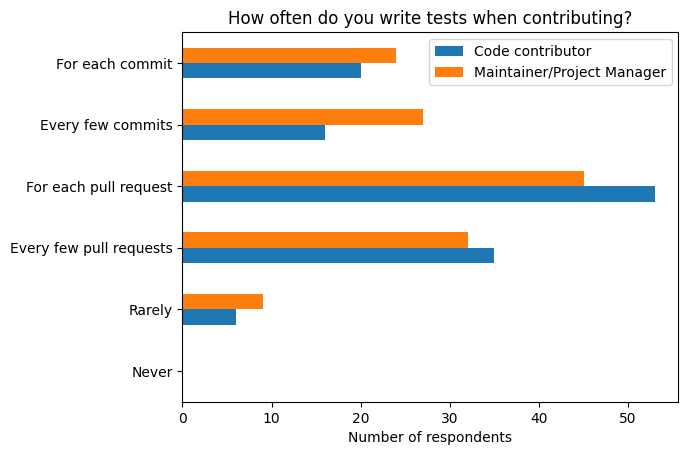

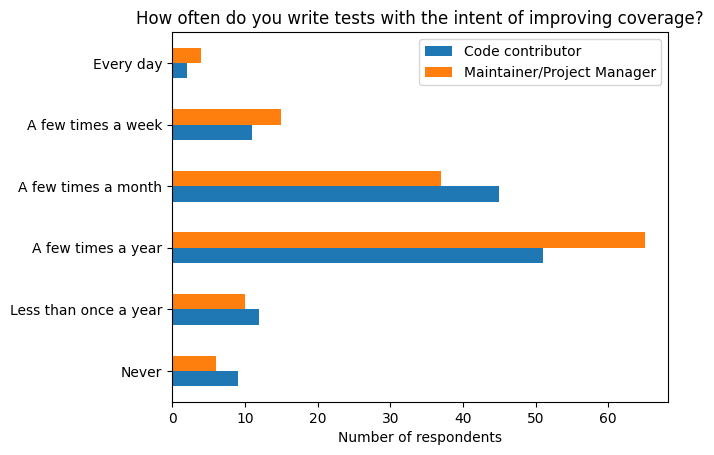

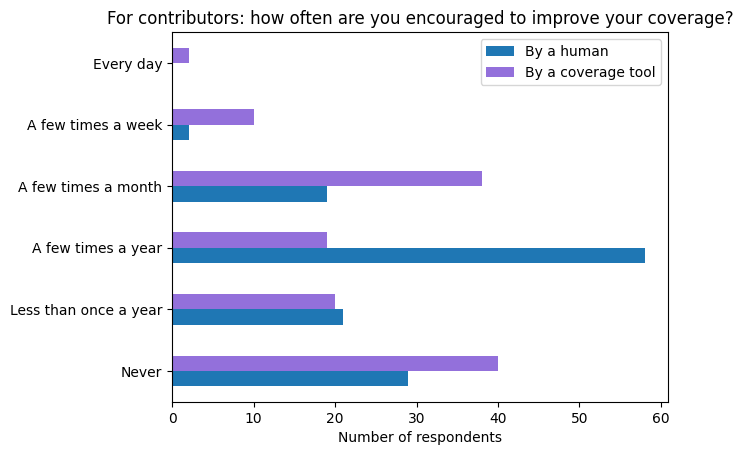

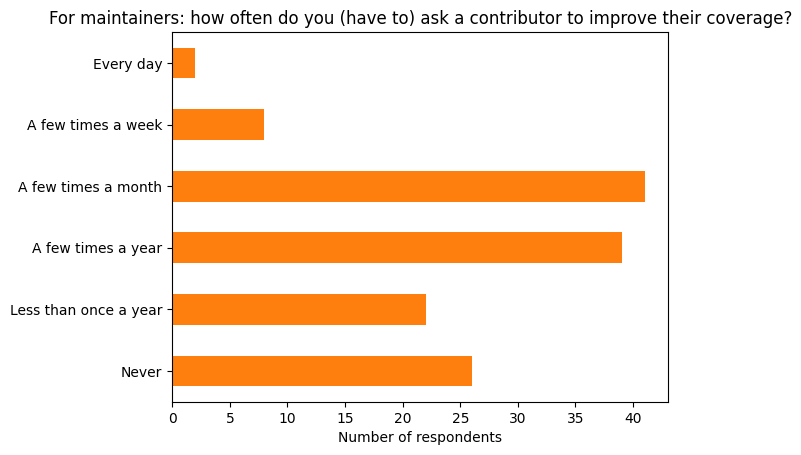

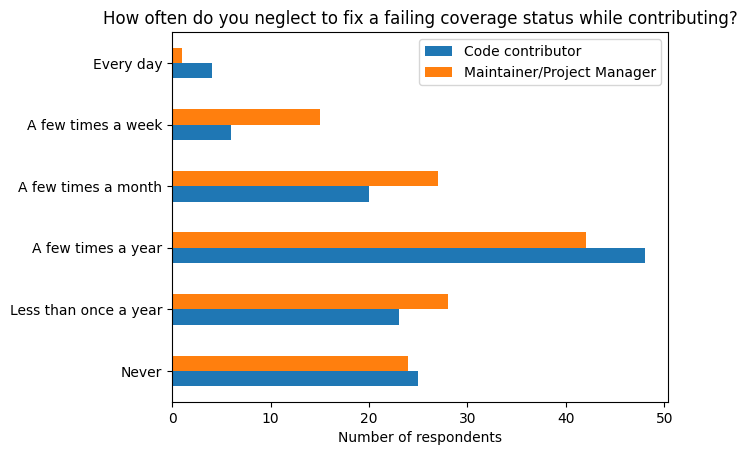

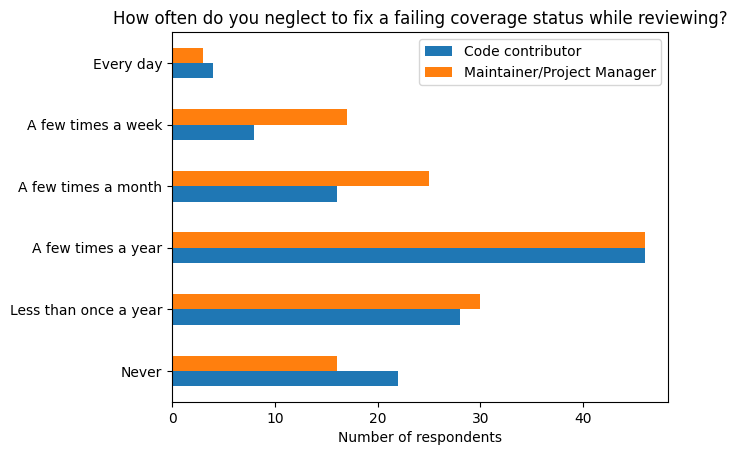

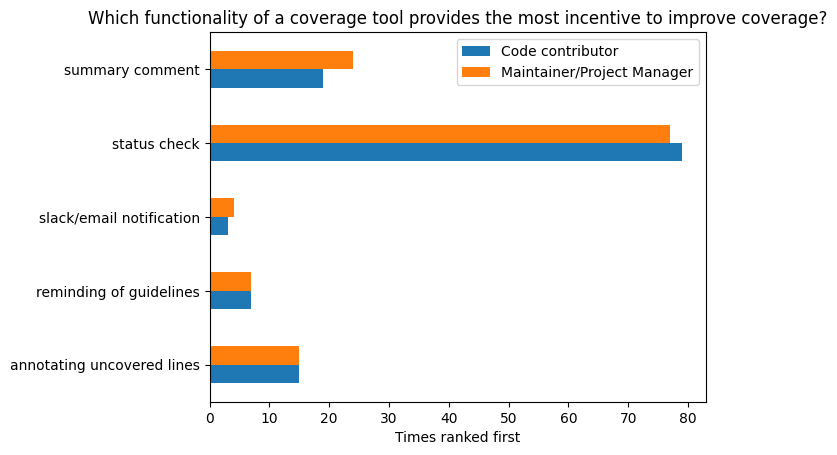

In [41]:
from src.rq3._questions import QUANTITATIVE

for k in QUANTITATIVE:
    v = QUANTITATIVE[k]
    # non-grouped metrics
    if type(k) == tuple:
        s = df[list(k)]
        s = s.apply(lambda x: x.value_counts())
        if "order" in v:
            s = s.reindex(v["order"])
        ax = s.plot(
            kind=v["kind"],
            color=v["colors"] if "colors" in v else None,
            title=v["title"] if "title" in v else None
        )
        ax.legend(
            labels=v["columns"] if "columns" in v else None
        )
        if "xlabel" in v:
            ax.set_xlabel(v["xlabel"])
        else:
            ax.set_xlabel("Number of respondents")
        continue

    # grouped metrics
    s = df.groupby("Dev/Maintain choice")[k]
    if v["kind"].startswith("bar"):
        s = s.value_counts().unstack().transpose()
        if "order" in v:
            s = s.reindex(v["order"])
        ax = s.plot(
            kind=v["kind"],
            title=v["title"] if "title" in v else None,
            rot=v["rot"] if "rot" in v else None,
            figsize=v["figsize"] if "figsize" in v else None,
            color=v["colors"] if "colors" in v else None
        )
        legend = v["legend"] if "legend" in v else True
        if legend:
            ax.legend(
                labels=v["columns"] if "columns" in v else None,
                loc=v["loc"] if "loc" in v else None
            )
        else:
            ax.legend().set_visible(False)
        ax.set_ylabel("")
        if "xlabel" in v:
            ax.set_xlabel(v["xlabel"])
        else:
            ax.set_xlabel("Number of respondents")
    else:
        ax = s.plot(
            kind=v["kind"],
            title=v["title"] if "title" in v else None
        )
    plt.show()

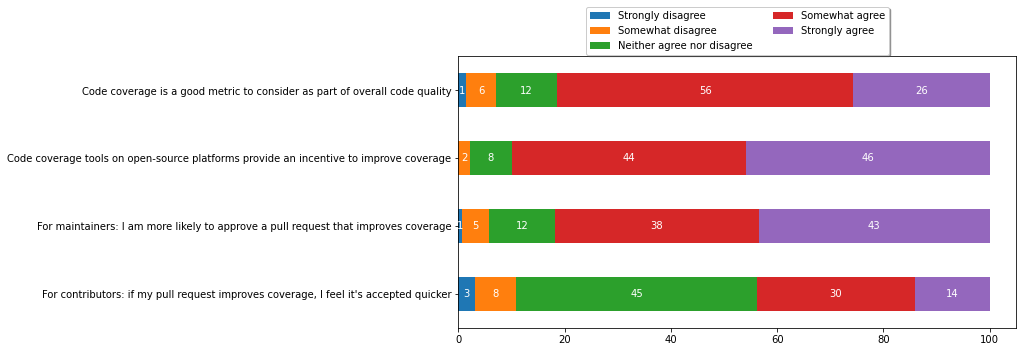

In [115]:
# from src.rq3._questions import matrix_order_2
#
# ax = df[["Q30_1", "Q30_2", "Q30_3", "Q30_4"][::-1]]. \
#     apply(lambda x: x.value_counts()). \
#     reindex(matrix_order_2[::-1]). \
#     transpose().fillna(0).apply(lambda x: x * 100 / sum(x), axis=1).rename(
#     index={k: v["title"] for k, v in QUANTITATIVE.items()}).plot.barh(stacked=True, figsize=(10, 5))
# ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2, fancybox=True, shadow=True)
# for c in ax.containers:
#     ax.bar_label(c, ["{:.0f}".format(v.get_width()) if v.get_width() > 0 else '' for v in c], label_type='center',
#                  color='white')

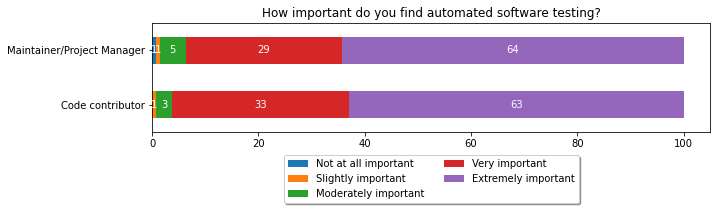

In [116]:
# from src.rq3._questions import matrix_order_4
#
# ax = df.groupby("Dev/Maintain choice")["Q18_1"]. \
#     apply(lambda x: x.value_counts()).unstack() \
#     .transpose().reindex(matrix_order_4[::-1]).fillna(0).transpose() \
#     .apply(lambda x: x * 100 / sum(x), axis=1) \
#     .plot.barh(stacked=True, title=QUANTITATIVE["Q18_1"]["title"], figsize=(10, 2))
# ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.7), ncol=2, fancybox=True, shadow=True)
# ax.set_ylabel(None)
# for c in ax.containers:
#     ax.bar_label(c, ["{:.0f}".format(v.get_width()) if v.get_width() > 0 else '' for v in c], label_type='center',
#                  color='white')

,1,2
0,,
"If you don't use coverage on Github, why? (alt. ending)",270,278
For contributors: Do you remember a particularly interesting instance where you were asked to improve coverage?,237,278
For maintainers: Do you remember a particularly interesting instance where you had to ask to improve coverage?,227,278
Additional comments,184,278
"For contributors: if my pull request improves coverage, I feel it's accepted quicker",150,278
For contributors: how often are you encouraged to improve your coverage?By a coverage tool,149,278
For contributors: how often are you encouraged to improve your coverage?By a human,149,278
For maintainers: how often do you (have to) ask a contributor to improve their coverage?,140,278
For maintainers: I am more likely to approve a pull request that improves coverage,140,278


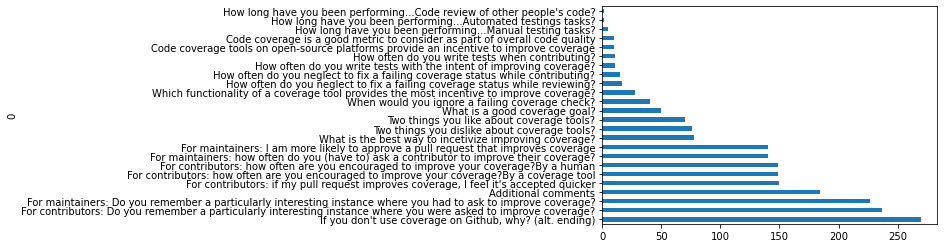

In [117]:
from src.rq3._questions import DEMOGRAPHIC, QUALITATIVE

nan = []
for k in DEMOGRAPHIC:
    l = [k]
    if type(k) == tuple:
        for _k in k:
            nan.append(
                (DEMOGRAPHIC[k]["title"] + DEMOGRAPHIC[k]["columns"][k.index(_k)], df[_k].isna().sum(), len(df[_k])))
    else:
        nan.append((DEMOGRAPHIC[k]["title"], df[k].isna().sum(), len(df[k])))
for k in QUANTITATIVE:
    l = [k]
    if type(k) == tuple:
        for _k in k:
            nan.append(
                (QUANTITATIVE[k]["title"] + QUANTITATIVE[k]["columns"][k.index(_k)], df[_k].isna().sum(), len(df[_k])))
    else:
        nan.append((QUANTITATIVE[k]["title"], df[k].isna().sum(), len(df[k])))

for k in QUALITATIVE:
    nan.append((k[1], df[k[0]].isna().sum(), len(df[k[0]])))
empty_qs = pd.DataFrame(nan).sort_values(1, ascending=False).set_index(0)
empty_qs[empty_qs[1] > 0][1].plot.barh()
empty_qs

,0,1
11,21,35
129,21,35
217,20,35
367,20,35
17,20,35
...,...,...
62,4,35
59,4,35
215,4,35
228,4,35


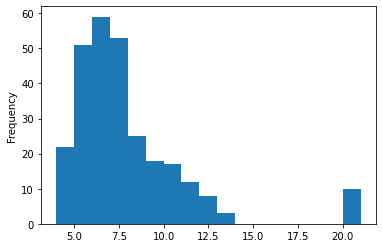

In [118]:
# Empty response per participant
# Note some questions can be left empty (i.e. comments, not visible to certain role)
from src.rq3._questions import QUALITATIVE

def req(REQUIRED_QUESTIONS, qs):
    for k in qs:
        if type(k) == tuple:
            REQUIRED_QUESTIONS.extend(k)
        else:
            REQUIRED_QUESTIONS.append(k)


REQUIRED = []
req(REQUIRED, DEMOGRAPHIC)
req(REQUIRED, QUANTITATIVE)
req(REQUIRED, [c[0] for c in QUALITATIVE])

empty_ps = df[REQUIRED].isna().apply(lambda x: [x.sum(), len(x)], axis=1, result_type='expand').sort_values(0,
                                                                                                            ascending=False)
empty_ps[0].plot.hist(bins=21 - 4)
empty_ps


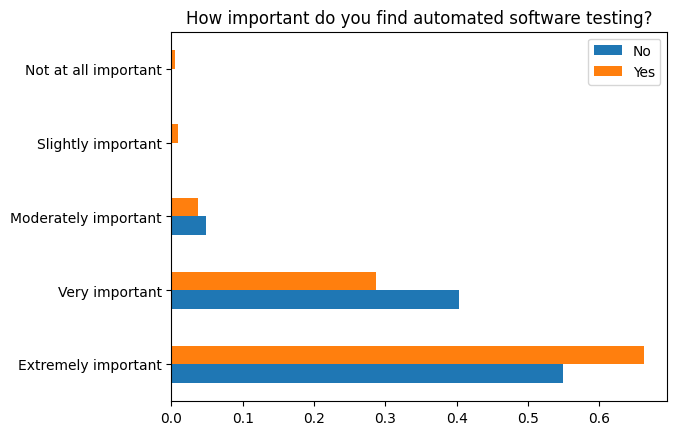

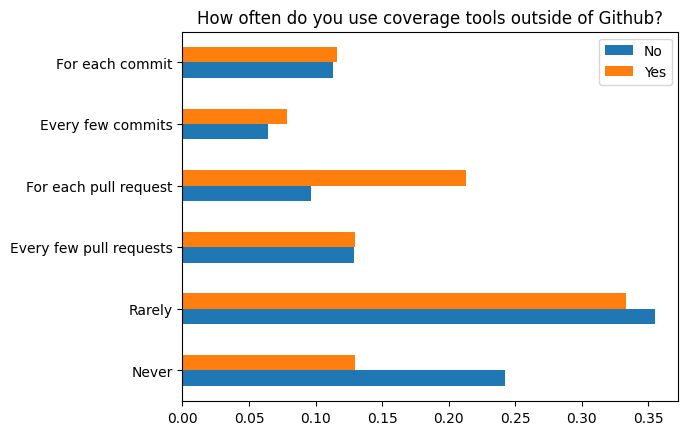

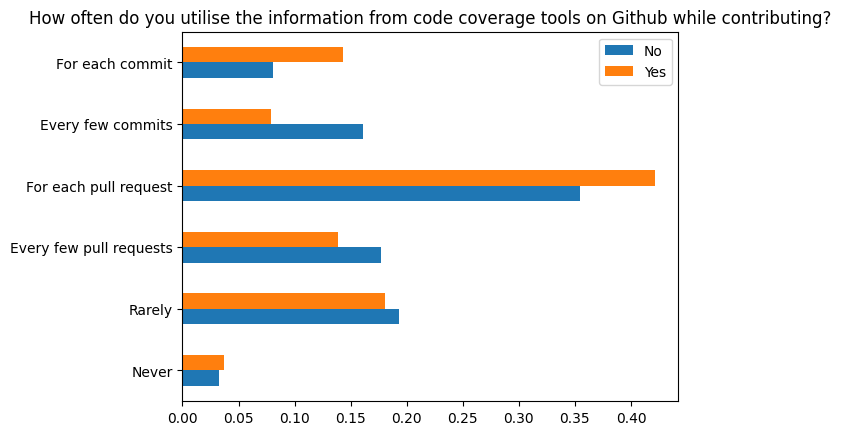

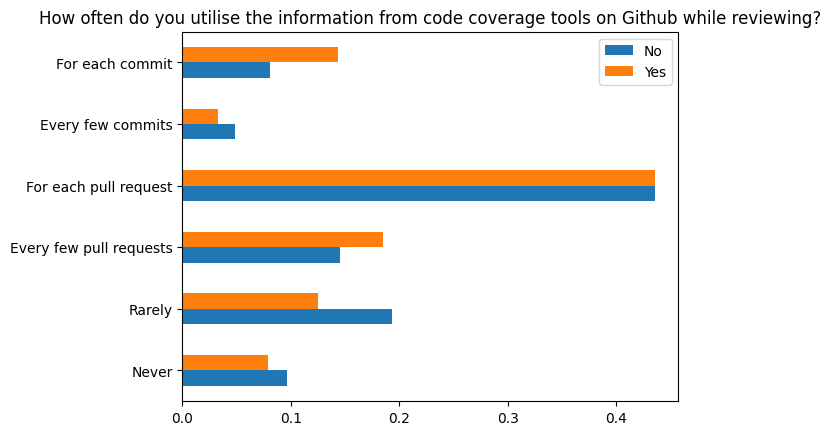

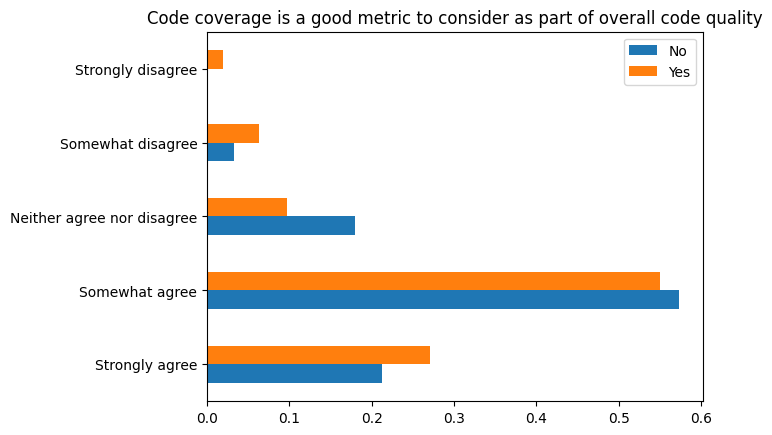

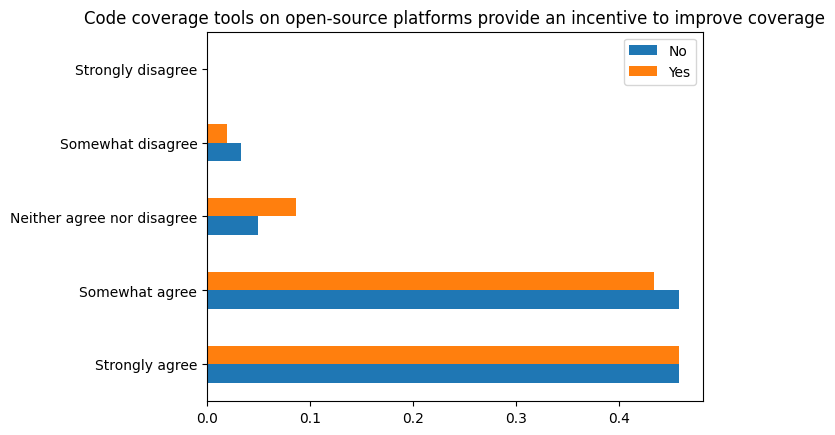

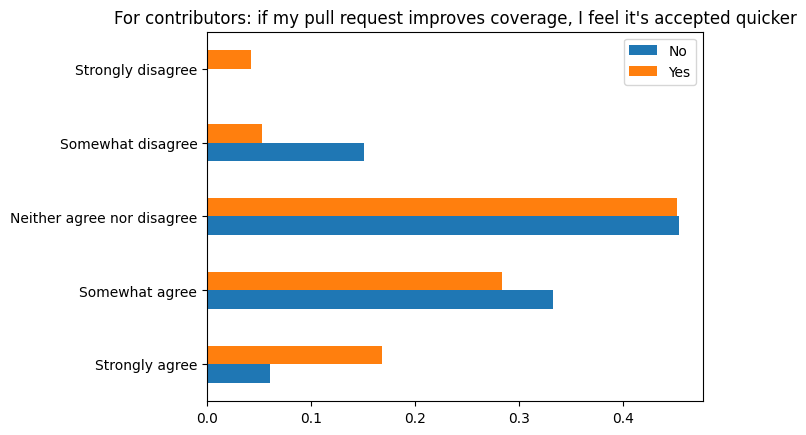

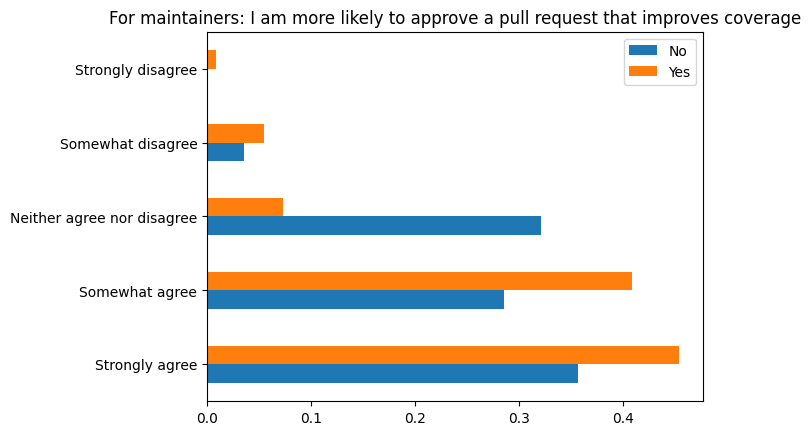

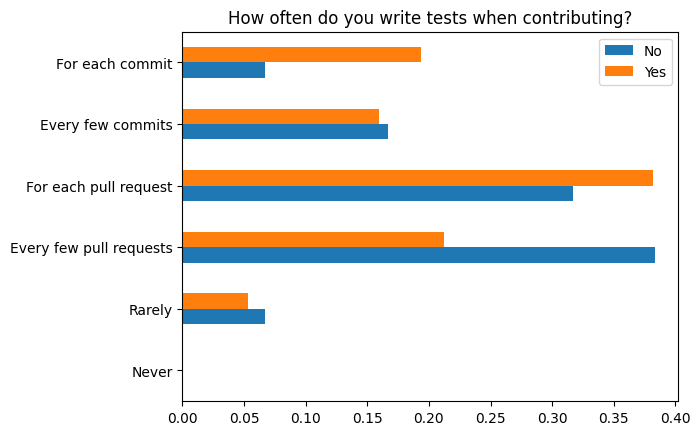

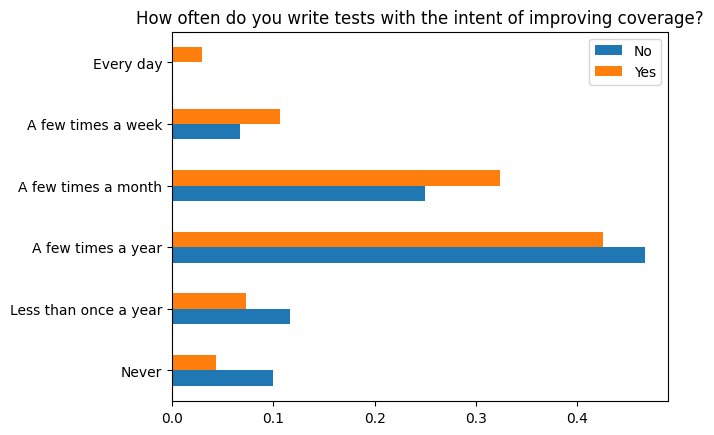

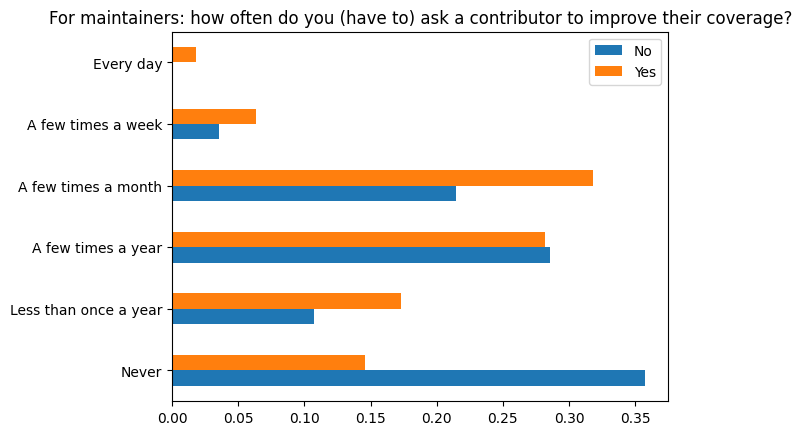

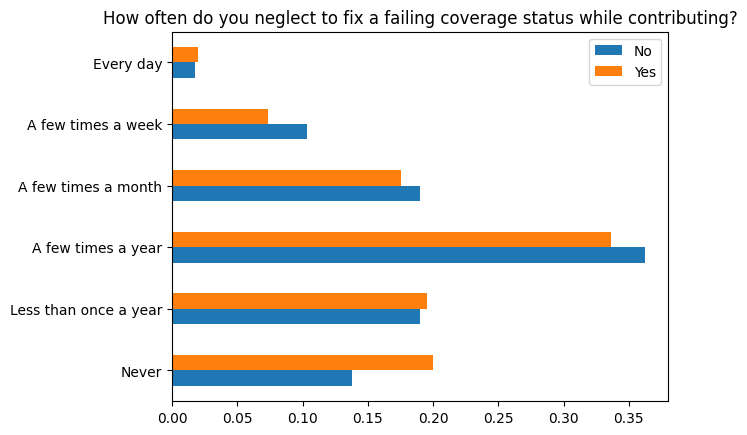

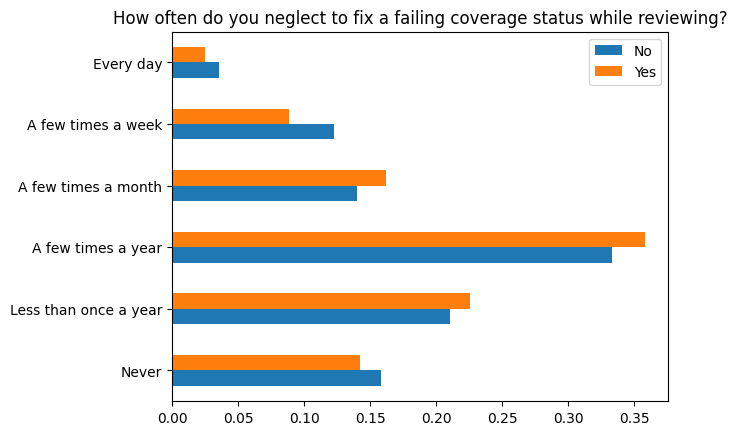

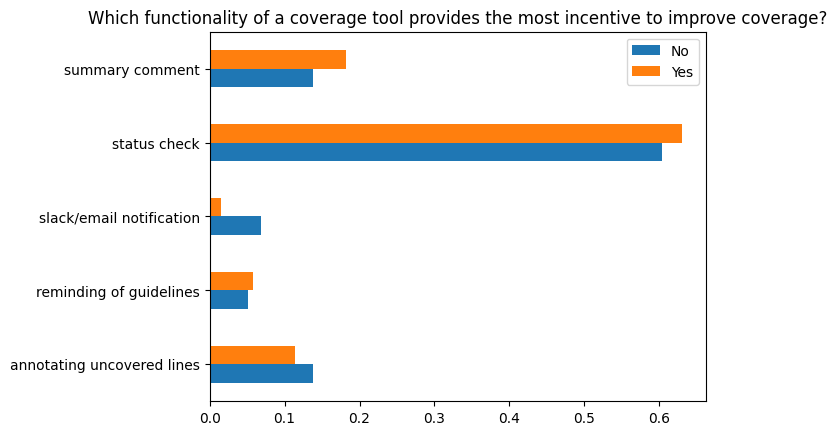

In [36]:
from src.rq3._questions import QUANTITATIVE

for k in QUANTITATIVE:
    v = QUANTITATIVE[k]
    # non-grouped metrics
    if type(k) == tuple:
        continue

    # grouped metrics
    s = df.groupby("Q15")[k]
    if v["kind"].startswith("bar"):
        s = s.value_counts().unstack().transpose()
        s = s / s.sum(0)
        if "order" in v:
            s = s.reindex(v["order"])
        ax = s.plot(
            kind=v["kind"],
            title=v["title"] if "title" in v else None,
            rot=v["rot"] if "rot" in v else None,
            figsize=v["figsize"] if "figsize" in v else None,
            # color=v["colors"] if "colors" in v else None
        )
        ax.legend(
            labels=v["columns"] if "columns" in v else None,
            loc=v["loc"] if "loc" in v else None
        )
        ax.set_ylabel("")
    else:
        s.plot(
            kind=v["kind"],
            title=v["title"] if "title" in v else None
        )
    plt.show()


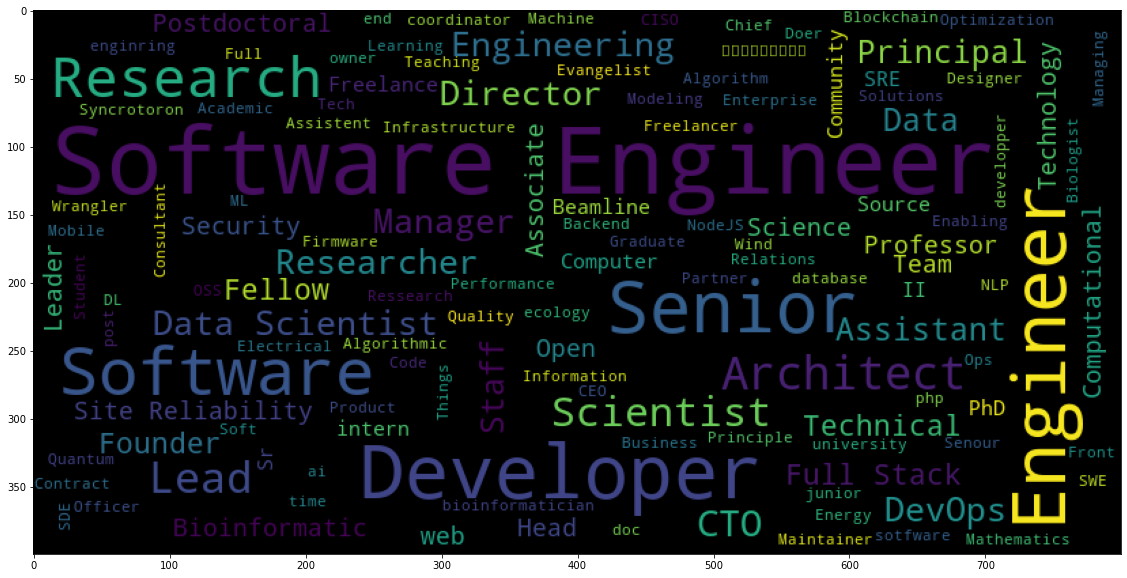

In [120]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400).generate(' '.join(df["Q16"].dropna()))
plt.figure(figsize=(20, 10))
plt.imshow(wc)


In [ ]:
occupations = df["Q16"]
# split words
# occupations = occupations.str.split(" ")
# flatten list
# occupations = occupations.explode()
# remove empty strings
occupations = occupations[occupations != ""]
#remove na
occupations = occupations.dropna()
# all lowercase
occupations = occupations.str.lower()
# count words
occupations = occupations.value_counts()
# plot top 10

# occupations.to_excel(results_dir / "occupations_v2.xlsx")

occupations[:10].plot.barh()

In [25]:
occupations = df["Q16"]
# remove empty strings
occupations = occupations[occupations != ""]
# drop nan
occupations = occupations.dropna()
# export to Excel
# occupations.to_excel(results_dir / "occupations.xlsx")

In [122]:
((df[["Q43_1", "Q43_2"]] == "Never").sum(1) == 2).sum()

9

In [123]:
len(df) - _


269

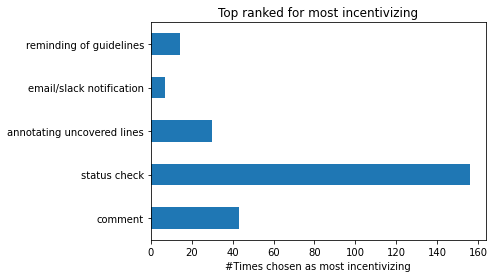

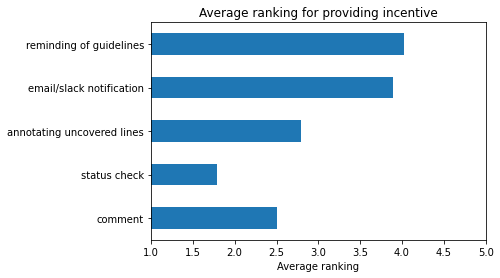

In [124]:
(df[[k for k in options]] == 1.0).sum(axis=0).rename(options).plot.barh(rot=0,
                                                                        title="Top ranked for most incentivizing")
plt.xlabel("#Times chosen as most incentivizing")
plt.show()
(df[[k for k in options]]).mean(axis=0).rename(options).plot.barh(rot=0,
                                                                  title="Average ranking for providing incentive", )
plt.xlim(1, 5)
plt.xlabel("Average ranking")
plt.show()


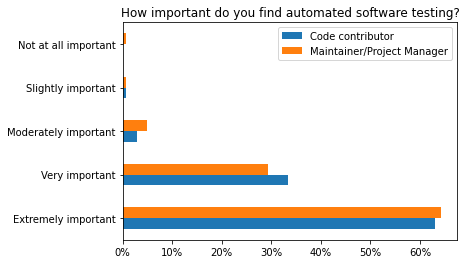

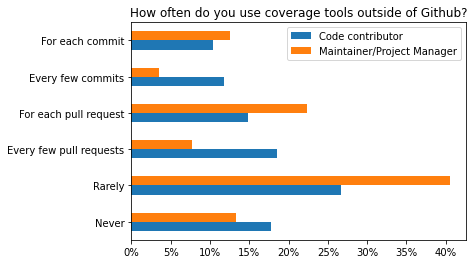

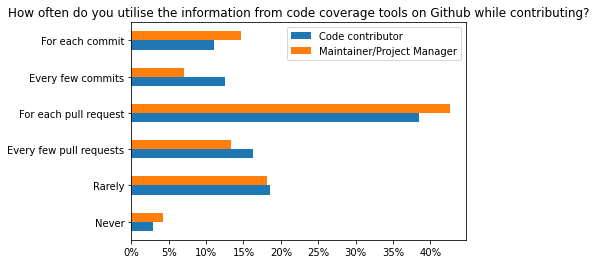

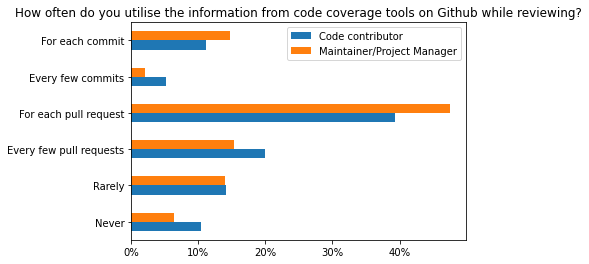

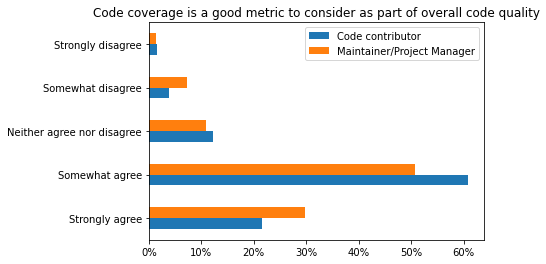

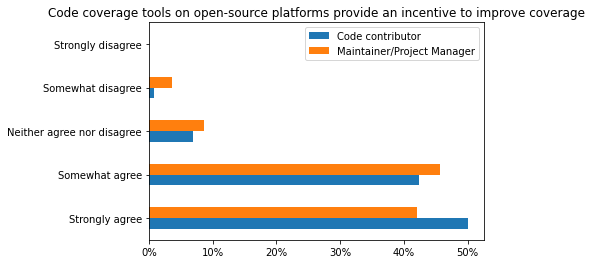

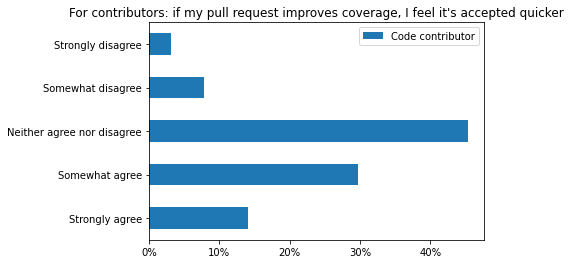

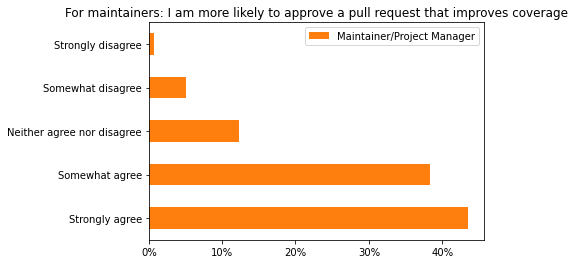

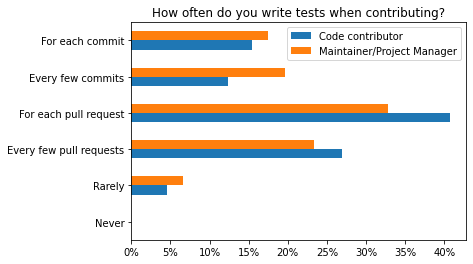

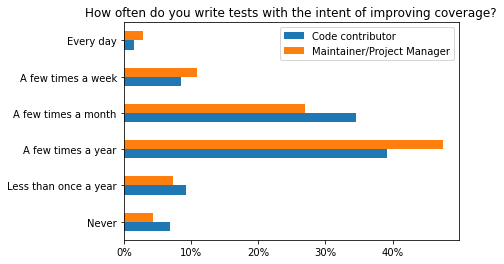

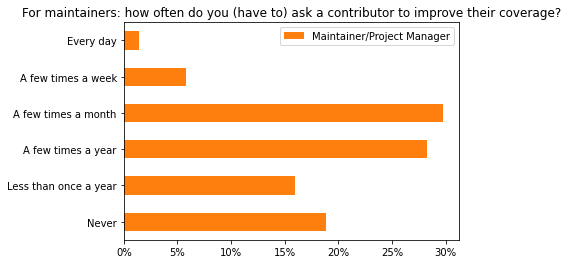

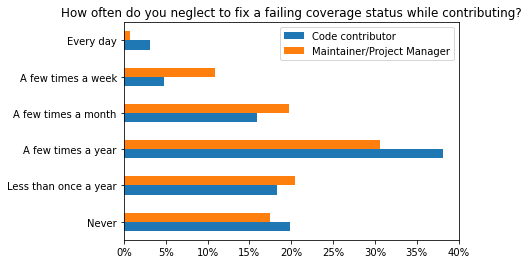

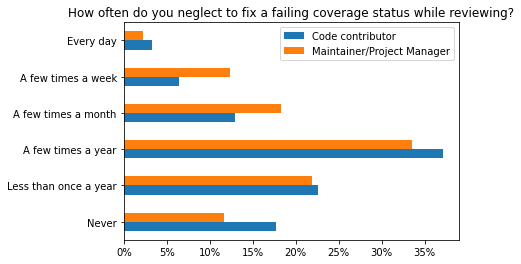

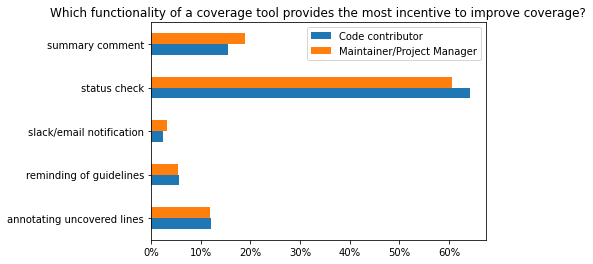

In [264]:
from matplotlib.ticker import PercentFormatter

for k in QUANTITATIVE:
    v = QUANTITATIVE[k]
    # non-grouped metrics
    if type(k) == tuple:
        continue

    # grouped metrics
    s = df.groupby("Dev/Maintain choice")[k]
    if v["kind"].startswith("bar"):
        s = s.value_counts().unstack().transpose()
        if "order" in v:
            s = s.reindex(v["order"])
        s = s / s.sum(0) * 100
        ax = s.plot(
            kind=v["kind"],
            title=v["title"] if "title" in v else None,
            rot=v["rot"] if "rot" in v else None,
            figsize=v["figsize"] if "figsize" in v else None,
            color=v["colors"] if "colors" in v else None
        )
        ax.legend(
            labels=v["columns"] if "columns" in v else None,
            loc=v["loc"] if "loc" in v else None
        )
        ax.set_ylabel("")
        ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
    else:
        s.plot(
            kind=v["kind"],
            title=v["title"] if "title" in v else None
        )
    plt.show()
